# Install the necessary libraries for this project.

In [4]:
! pip install -r requirements.txt

^C


# Import Libraries
Import the necessary libraries for this project.

In [2]:
# Import the necessary libraries.
import os
import numpy as np
from matplotlib import pyplot as plt, image as mpimg
%matplotlib inline
from PIL import Image
import torch
import torchvision
from torchvision import transforms, datasets
import torch.utils as utils
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
 



print('All libraries are imported and ready to use!')

All libraries are imported and ready to use!


# Explore the Image data.

There are 2 classes of images to be classify, which are: the presence of diabetic retinopathy [DR] and the absence of diabetic retinopathy [No_DR]



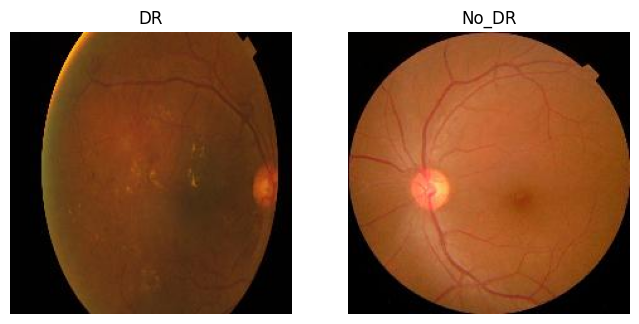

In [3]:
# The images are located in the data path.
train_data_path = "diabetic_retinopathy_dataset/train"

# Get the classes of images to be classified.
classes = os.listdir(train_data_path)
print(f"There are {len(classes)} classes of images to be classify, which are: the presence of diabetic retinopathy [{classes[0]}]" +
      f" and the absence of diabetic retinopathy [{classes[1]}]\n")


# Display the classes of images to be classified.
fig = plt.figure(figsize=(8, 10))

# Initialize the subplot index.
i = 0

for sub_directory in os.listdir(train_data_path):
    i += 1
    
    # Get the file path of the first image in each directory.
    image_path = os.listdir(os.path.join(train_data_path, sub_directory))[0]
    image_file = os.path.join(train_data_path, sub_directory, image_path)
    
    # Read the image file using matplotlib image module.
    image = mpimg.imread(image_file)
    
    # Add a subplot for each class and display the image.
    ax= fig.add_subplot(1, len(classes), i)
    ax.axis("off")
    ax.set_title(f"{sub_directory}")
    
    plt.imshow(image)
    
    

In [4]:
# Check the dimensions of the image.
for sub_directory in os.listdir(train_data_path):
    i += 1
    
    # Get the file path of the first image in each directory.
    image_path = os.listdir(os.path.join(train_data_path, sub_directory))[0]
    image_file = os.path.join(train_data_path, sub_directory, image_path)
    
    # Open the image file using PIL.
    image = Image.open(image_file)
    
    # Get the width and height of the image.
    width = image.width
    height = image.height 
    
    # Print the width and height of the image.
    print(f"The width and height of the {sub_directory} image are {width} and {height} pixels respectively.")

The width and height of the DR image are 224 and 224 pixels respectively.
The width and height of the No_DR image are 224 and 224 pixels respectively.


# Load the image data.
Load the image data for training of models, validating and evaluation of models.

In [7]:
# random state for reproducibility.
torch.manual_seed(2024)

def load_data(train_data_path, val_data_path, test_data_path):
    """This function ingests the image data using the training, validation and testing loaders, transforms the data, 
    and normalizes them to have a mean of 0.5 and a standard deviation of 0.5.

    Args:
        train_data_path (str): The directory containing the train image data.
        val_data_path (str): The directory containing the train image data.
        test_data_path (str): The directory containing the train image data.
        
    Returns:
        train_loader: DataLoader for the training dataset.
        val_loader: DataLoader for the validation dataset.
        test_loader: DataLoader for the test dataset.
    """ 
    
    
    # Define the transformation to be performed on the train image dataset.
    train_trasnformations = transforms.Compose([
        # Resize the image.
        transforms.Resize((224, 224)),
        
        # Random rotation of the image by a given angle (degrees)
        transforms.RandomRotation(degrees=30),
        
        # Random horizontal flip with a probability of 0.5
        transforms.RandomHorizontalFlip(p=0.5),
        
        # Random vertical flip with a probability of 0.5
        transforms.RandomVerticalFlip(p=0.5),
        
        # Convert images to tensors.
        transforms.ToTensor(),
    
        # Normalize the pixel values (in RGB channels).
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    # Define the transformation to be performed on the validation image dataset.
    val_transformations = transforms.Compose([
        # Resize the image.
        transforms.Resize((224, 224)),
        
        # Convert images to tensors.
        transforms.ToTensor(),
    
        # Normalize the pixel values (in RGB channels).
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    # Define the transformation to be performed on the testing image dataset.
    test_transformations = transforms.Compose([
        # Resize the image.
        transforms.Resize((224, 224)),
        
        # Convert images to tensors.
        transforms.ToTensor(),
    
        # Normalize the pixel values (in RGB channels).
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    
    # Load the train dataset using ImageFolder.
    train_dataset = datasets.ImageFolder(
        root=train_data_path,
        transform=train_trasnformations
    )
    
    # Load the validation dataset using ImageFolder.
    val_dataset = datasets.ImageFolder(
        root=train_data_path,
        transform=val_transformations
    )
    
    # Load the test dataset using ImageFolder.
    test_dataset = datasets.ImageFolder(
        root=train_data_path,
        transform=test_transformations
    )
    
    
    # Create DataLoader Instances for training to iterate in batches of 32 images.
    train_loader = utils.data.DataLoader(
        train_dataset,
        batch_size=50, 
        num_workers=1,
    )
    
    # Create DataLoader Instances for training to iterate in batches of 64 images.
    val_loader = utils.data.DataLoader(
        val_dataset,
        batch_size=64, 
        num_workers=1,
    )
    
    # Create DataLoader Instances for training to iterate in batches of 64 images.
    test_loader = utils.data.DataLoader(
        test_dataset,
        batch_size=64, 
        num_workers=1,
    )
    
        
    return train_loader, val_loader, test_loader

# Define the validation & testing path.
val_data_path, test_data_path = ("diabetic_retinopathy_dataset\valid", "diabetic_retinopathy_dataset\test")


# Get the training, validation and testing dataset iteratively in batches.
train_loader, val_loader, test_loader = load_data(train_data_path, val_data_path, test_data_path)
print("Data are loaded and are ready to use!")

Data are loaded and are ready to use!


Since the training dataset has been loaded, it will be used to train the Convolutional Neural Network (CNN) model. The loaded validation dataset will be used to monitor the performance of the trained CNN model during the training process. The loaded testing dataset is used to evaluate the final performance of the trained CNN model.

# Define the CNN architecture and the layers in the Network.

In [8]:
def out_conv(input, kernel, padding, stride):
    output = input - kernel + (2 * padding)
    output /= stride 
    output += 1
    return int(output)


def out_pool(input_size, pooling, stride):
    output = input_size - pooling 
    output /= stride
    output += 1
    return int(output) 


# First Convolutional Layer.
output = out_conv(224, 3, 1, 1)
print(f"The output size after the first convolutional layer is: {output}")

# Second Convolutional Layer.
output = out_conv(output, 3, 1, 1)
print(f"The output size after the second convolutional layer is: {output}")

# First Pooling Layer.
output = out_pool(output, 2, 2)
print(f"The output size after the first pooling layer is: {output}")

# Third Convolutional Layer.
output = out_conv(output, 3, 1, 1)
print(f"The output size after the third convolutional layer is: {output}")

# Second Pooling Layer
output = out_pool(output, 2, 2)
print(f"The output size after the second pooling layer is: {output}")

# Fourth Convolutional Layer.
output = out_conv(output, 3, 1, 1)
print(f"The output size after the fourth convolutional layer is: {output}")

# Fifth Convolutional Layer.
output = out_conv(output, 3, 1, 1)
print(f"The output size after the fifth convolutional layer is: {output}")

# Third Pooling Layer
output = out_pool(output, 2, 2)
print(f"The output size after the third pooling layer is: {output}")

The output size after the first convolutional layer is: 224
The output size after the second convolutional layer is: 224
The output size after the first pooling layer is: 112
The output size after the third convolutional layer is: 112
The output size after the second pooling layer is: 56
The output size after the fourth convolutional layer is: 56
The output size after the fifth convolutional layer is: 56
The output size after the third pooling layer is: 28


In [16]:
# Define the CNN model architecture.

class RetinoCNN(nn.Module):
    """This class defines the architecture of the Convolutional Neural Network (CNN) using the nn module as the base or parent class."""
    
    def __init__(self):
        super(RetinoCNN, self).__init__()
        
        # First convolutional layer that applies 32 filters for RGB images.
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Second convolutional layer that takes input channnels and generates 32 outputs.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # First pooling layer with a kernel of 3.
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        # Third convolutional layer that takes input channels and generates outputs.
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Second pooling layer with a kernel of 3.
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fourth convolutional layer that takes input channels and generates outputs.
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # First dropout layer to drop 20% of the features, dropout helps to avoid overfitting.
        self.drop1 = nn.Dropout2d(p=0.2)
        
        # Fifth convolutional layer that takes input channels and generates outputs.
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Third pooling layer with a kernel of 3.
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        
        # Second dropout layer to drop 20% of the features, dropout helps to avoid overfitting.
        self.drop2 = nn.Dropout2d(p=0.2)
        
        # Flatten the feature tensors and feed them into the first fully connected layer.
        self.fc = nn.Linear(in_features=28 * 28 * 128, out_features=1)  
    
        
    def forward(self, x):
        
        # Apply  1st Conv -> ReLU 
        x = F.relu(self.conv1(x))
        
        # Apply 2nd Conv -> ReLU -> 1st MaxPool 
        x = self.pool1(F.relu(self.conv2(x)))
        
        # Apply 3rd Conv -> ReLU -> 2nd MaxPool 
        x = self.pool2(F.relu(self.conv3(x)))
        
        # Apply 4th Conv -> ReLU 
        x = F.relu(self.conv4(x))
        
        # Apply 1st Drop
        x = self.drop1(x)
        
        # Apply 5th Conv -> ReLU -> 3rd MaxPool 
        x = self.pool3(F.relu(self.conv5(x)))
        
        # Apply 2nd Drop
        x = self.drop2(x)
        
        # Flatten the output before feeding it into the fully connected layer.
        x = x.view(-1, 28 * 28 * 128)
        
        # Feed the output to the fully connected layer.
        x = self.fc(x)
        
        # # Apply sigmoid activation for binary classification.
        # x = torch.sigmoid(x)
        
        # # Reshape the output 
        # x = x.view(-1)
        
        return x 
    
    print("CNN architecture has been defined!")           
        

CNN architecture has been defined!


# Training the model.
Since the CNN architecture has been defined, we can now use the image data to train the network.

In [21]:
def train_model(device, cnn_model, train_loader, optimizer, epoch):
    """This function trains the model using the train_loader dataset."""
    
    # Set the model to training mode.
    cnn_model.train()
    # Initialize the train loss.
    total_train_loss = 0
    
    print(f"\nEpoch: {epoch}")
    
    # Process the images in batches.
    for batch_idx, (input, label) in enumerate(train_loader):
        # Use the device specified for hardware acceleration.
        input, label = input.to(device), label.to(device)
        
        # Reset the optimizer selected.
        optimizer.zero_grad()
        
        # Push the data forward through the model layers.
        output = cnn_model(input).squeeze()
        print(output)
    #     loss = loss_criteria(output, label)
       
    #     # Keep a running total loss.
    #     total_train_loss += loss.item()
        
    #     # Backpropagate.
    #     loss.backward()
    #     optimizer.step()
        
    #     # Print metrics for every 10 batches.
    #     if batch_idx % 10 == 0:
    #         print(f"Training set [{batch_idx * len(input)}/{len(train_loader.dataset)}  ({100 * (batch_idx / len(train_loader)):.0f}%)] Loss: {loss.item():.4f}")  
        
    #     # Return the average loss for each epoch.
    #     avg_loss = total_train_loss / (batch_idx + 1)
    #     print(f"Average Training Loss: {avg_loss:.4f}")
        
    # print("Training Completed!")

        
        


# def validate_model(device, cnn_model, val_loader):
#     """This function validate the model using the val_loader dataset."""
    
#     # Switch the model to evaluation mode.
#     cnn_model.eval()
#     print("Model Validation Starts!")
    
#     # Initialize the validation loss.
#     val_loss = 0
#     # Initialize the amount or number of correct predictions.
#     correct = 0
#     outputs = []
#     with torch.no_grad():
#         # Initialize the batch count.
#         for input, label in val_loader:
#             batch_count += 1
#             input, label = input.to(device), label.to(device)
            
#             # Get the model output for this batch by feeding the input.
#             output = cnn_model(input).squeeze()
            
#             # Calculate the loss for this batch.
#             loss = loss_criteria(output, label)
#             val_loss += loss.item()
            
#             # Calculate the accuracy metric for this batch.
#             # max_logsoftmax
#             outputs.append(output.item())
#             # correct += torch.sum(label == prediction).item()
    
#     # Calculate the total accuracy and average loss metric for each epoch.
#     avg_loss = val_loss / batch_count
#     print(f'Average Validation Loss: {avg_loss:.4f}, Accuracy: {correct}/{len(val_loader.dataset)} ({100 * correct / len(val_loader.dataset):.0f}%)\n')
    
#     # Return average loss for each epoch.
#     return avg_loss
            
     
     
     
#----------It is time to use the train function to train and the validatio function to evaluate how the model is performing.----------

# Check if GPU is available as the hardware accelerator.
if (torch.cuda.is_available()):
    device = "cuda"
# If false, use cpu as the hardware accelerator.
else:
    device = "cpu"
print(f"Training on {device}\n")

# Create an instance of the model class and allocate it to the available device.
model = RetinoCNN().to(device)


# Use Adaptive Moment Estimation Optimization to adjust and update the model weights.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Specify the Binary Cross Entropy Loss as the loss criteria for the binary classification tasks.
loss_criteria = nn.BCELoss()

# initialize empty arrays to track loss metrics.
num_epoch, training_loss, validation_loss = [], [], []

# Train over 20 epochs.
epochs = 1
for epoch in range(1, epochs+1):
    train_loss = train_model(device, model, train_loader, optimizer, epoch)
    
    # val_loss = validate_model(device, model, val_loader)
    
    # Append the metrics to the predefined empty array.
    num_epoch.append(epoch)
    training_loss.append(train_loss)            
    # validation_loss.append(val_loss)
    

Training on cpu


Epoch: 1


RuntimeError: Found dtype Long but expected Float